In [807]:
# imports libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
#hyperparametre 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# EDA

In [808]:
# Import database
# Check the 3 csv files
df_2018=pd.read_csv("data_2018.csv")
df_2019=pd.read_csv("data_2019.csv")
df_2020=pd.read_csv("data_2020.csv")

# Working on copies of the original dataframes
df18=df_2018.copy()
df19=df_2019.copy()
df20=df_2020.copy()

In [809]:
# Check correct display of the files
print(df18.head())  #26 columns
print(df19.head())  #26 columns
print(df20.head())  #27 columns

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K  Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            C2S1      -1

In [810]:
# Check different columns
df18.info()
df19.info()
df20.info()
# 1 column is empty in 2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [811]:
# Drop column 'Unnamed: 8' from df_2020
df20 = df20.drop(columns=['Unnamed: 8'])

#### Anomalies

In [812]:
### Columns' names are different in dataframes
# Compare columns' names of two dataframes
for i in range (len(df18.columns)):
    if df18.columns[i] != df19.columns[i] != df20.columns[i]:
        print(f"{df18.columns[i]} {df19.columns[i]} {df20.columns[i]}")
# datas from 2019 have different columns' names than 2018 and 2020

E.C EC E.C
CO3 CO_-2  CO3
HCO3 HCO_ -  HCO3
Cl Cl - Cl
F F - F
NO3  NO3-  NO3 
SO4 SO4-2 SO4
Na Na+ Na
K K+ K
Ca Ca+2 Ca
Mg Mg+2 Mg


In [813]:
# Rename columns from 2019 dataframe
# df19.columns = df18.columns  # This one is less flexible than using .rename() from pandas
df19 = df19.rename(columns=dict(zip(df19.columns, df18.columns)))

#### Duplicates

In [814]:
# Check total duplicates
df18.duplicated().sum(), df19.duplicated().sum(), df20.duplicated().sum()

(0, 0, 0)

#### Concatenate

In [815]:
df=pd.concat([df18, df19, df20])



In [816]:
# Supprimer les lignes contenant la valeur '8..05'
value_to_remove = '8..05'
df = df[df['pH'] != value_to_remove]


In [817]:
print(df.head()) 

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K    Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48.0  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56.0  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24.0  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32.0  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56.0  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            

#### Missing datas

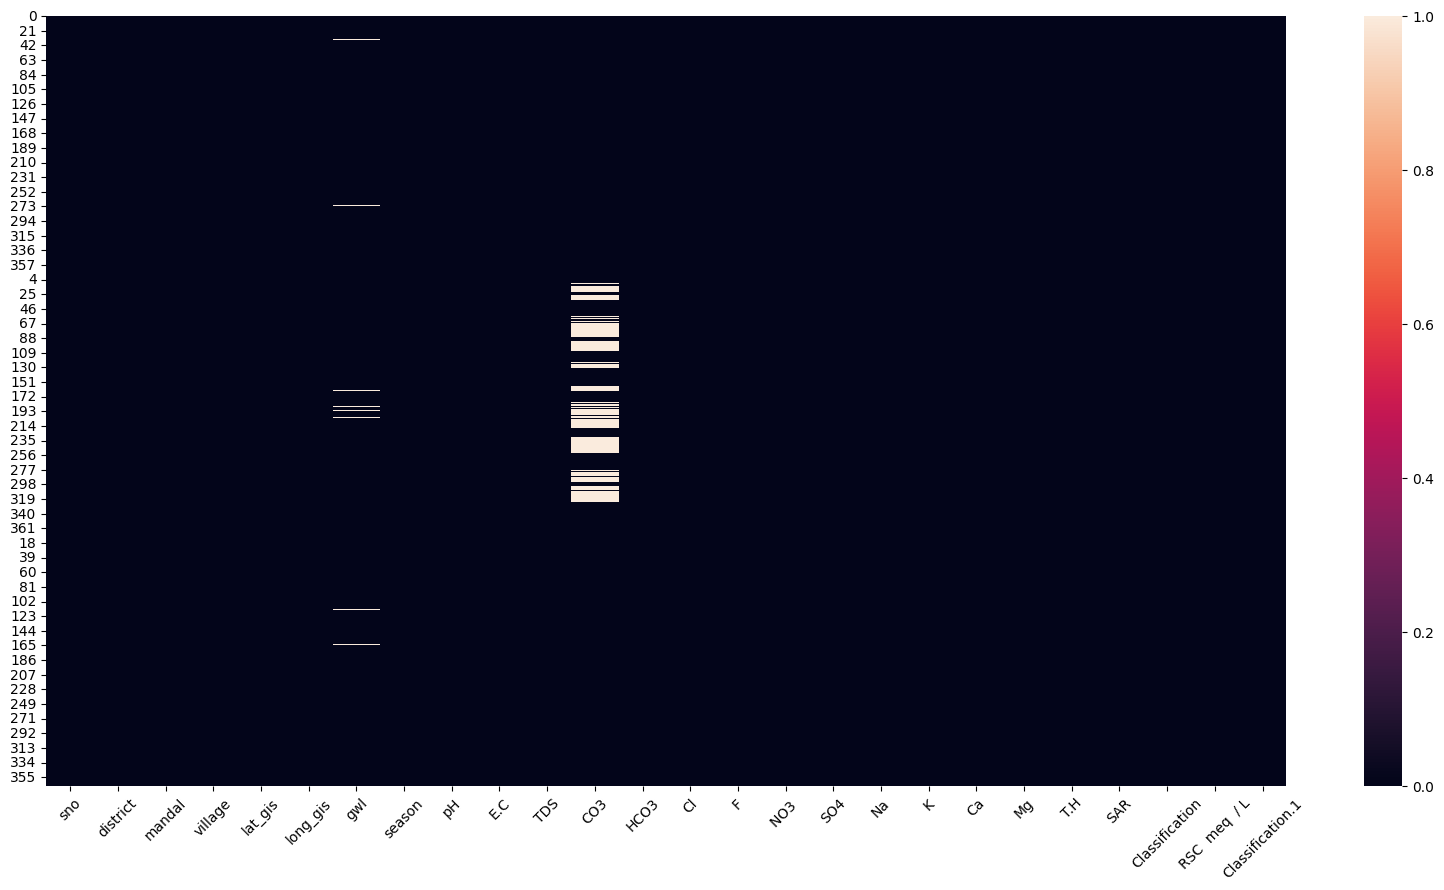

In [818]:
# Visualize missing datas
plt.figure(figsize=(20,10))     
sns.heatmap(df.isna()) 
plt.xticks(rotation=45)   
plt.show() 

In [819]:
# Check for percentages of missing values in each dataframe
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=True).round(2)

# drop 1% missing (I won't take any risk of modifying for so few)
# 14% : check by boxplot (if not many outliers : mean, else median)

sno                  0.00
Classification       0.00
SAR                  0.00
T.H                  0.00
Mg                   0.00
Ca                   0.00
K                    0.00
Na                   0.00
SO4                  0.00
NO3                  0.00
F                    0.00
Cl                   0.00
HCO3                 0.00
TDS                  0.00
E.C                  0.00
pH                   0.00
season               0.00
long_gis             0.00
lat_gis              0.00
village              0.00
mandal               0.00
district             0.00
RSC  meq  / L        0.00
Classification.1     0.00
gwl                  1.00
CO3                 14.48
dtype: float64

<Axes: xlabel='CO3'>

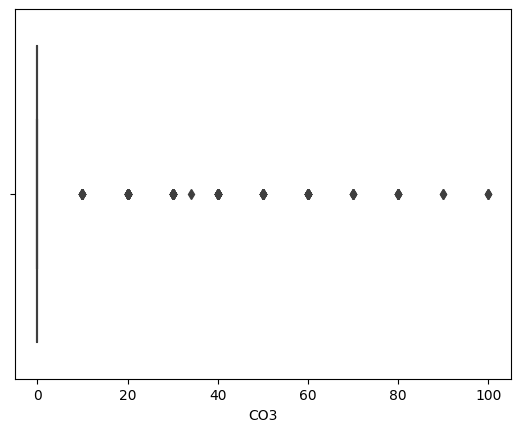

In [820]:
# Check outliers for CO3
sns.boxplot(x=df['CO3'])  

In [821]:
# Check total number of missing values for each different value in CO3 column
df['CO3'].value_counts()

CO3
0.000      779
20.000      44
30.000      29
40.000      27
60.000      21
50.000      15
10.000      11
80.000       8
70.000       5
100.000      3
90.000       2
34.034       1
Name: count, dtype: int64

In [822]:
"""# Créer un dictionnaire de correspondance pour les renommages
renaming_dict = {
    'C2S1': 'Moderate',
    'C3S1': 'Poor',
    'C4S2': 'Bad',
    'C4S1': 'Bad',
    'C3S2': 'Poor',
    'C4S4': 'Bad',
    'C4S3': 'Bad',
    'C1S1': 'Good',
    'C3S4': 'Bad',
    'C3S3': 'Poor',
    'C2S2': 'Moderate'
}

# Appliquer les renommages à la colonne 'Classification'
df['Classification'] = df['Classification'].map(renaming_dict)
"""

"# Créer un dictionnaire de correspondance pour les renommages\nrenaming_dict = {\n    'C2S1': 'Moderate',\n    'C3S1': 'Poor',\n    'C4S2': 'Bad',\n    'C4S1': 'Bad',\n    'C3S2': 'Poor',\n    'C4S4': 'Bad',\n    'C4S3': 'Bad',\n    'C1S1': 'Good',\n    'C3S4': 'Bad',\n    'C3S3': 'Poor',\n    'C2S2': 'Moderate'\n}\n\n# Appliquer les renommages à la colonne 'Classification'\ndf['Classification'] = df['Classification'].map(renaming_dict)\n"

### Supression des colonne que l'on ne doit pas utiliser

In [823]:
# Liste des colonnes à supprimer en rapport avec la localisation
columns_to_drop = ['district', 'mandal', 'village', 'lat_gis', 'long_gis', 'season', 'Classification.1']

# Supprimer les colonnes en rapport avec la localisation
df = df.drop(columns=columns_to_drop)

## LABEL ENCODER CLASSIFICATION

In [824]:
# Define a mapping dictionary for label replacement

label_mapping = {

    'C2S1|C2S2|C2S2': 'Moderate',

    'C4S3|C4S2|C4S1|C4S4|C3S4': 'Bad',

    'C3S1|C3S2|C3S3': 'Poor',

    'C1S1' : 'Good'

}

 

# Apply label replacement

df['Classification'] = df['Classification'].replace(label_mapping, regex=True)

 

# Drop rows where the 'Classification' wasn't matched in label_mapping

df = df[df['Classification'].isin(label_mapping.values())]

In [825]:


# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Liste des colonnes catégorielles à encoder
categorical_columns = ['Classification']

# Appliquer LabelEncoder aux colonnes catégorielles
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    

# Afficher le DataFrame avec les valeurs encodées
print(df)


     sno   gwl    pH   E.C      TDS   CO3   HCO3    Cl     F        NO3   \
0      1  5.09  8.28   745   476.80   0.0  220.0    60  0.44   42.276818   
1      2  5.10  8.29   921   589.44   0.0  230.0    80  0.56  100.659091   
2      3  4.98  7.69   510   326.40   0.0  200.0    30  0.66   41.471545   
3      4  5.75  8.09   422   270.08   0.0  160.0    10  0.58   10.669864   
4      5  2.15  8.21  2321  1485.44   0.0  300.0   340  2.56  128.843636   
..   ...   ...   ...   ...      ...   ...    ...   ...   ...         ...   
363  375  9.90   7.8  2324  1487.36   0.0  370.0   370  0.58  336.161100   
364  376  5.74  8.26  2109  1349.76   0.0  430.0   260  1.08  332.175000   
365  377  1.72  8.77  1115   713.60  20.0  180.0   220  0.34   44.201420   
366  378  1.65  7.76  5053  3233.92   0.0  280.0  1360  0.44   76.355960   
367  379  4.92  8.13  2280  1459.20   0.0  200.0   340  1.12  506.234700   

       SO4      Na      K     Ca       Mg          T.H       SAR  \
0     46.0   49.00 

# Correlations

sno: Numéro de série ou d'identification unique pour chaque enregistrement.

district: District géographique où les données ont été collectées.

mandal: Sous-région administrative ou administrative dans le district.

village: Village ou zone géographique plus petite que le mandal.

lat_gis: Latitude géographique du point de collecte des données.

long_gis: Longitude géographique du point de collecte des données.

gwl: Niveau d'eau souterraine (Ground Water Level) mesuré.

season: Saison pendant laquelle les données ont été collectées.

pH: Mesure de l'acidité ou de l'alcalinité de l'eau.

E.C: Conductivité électrique, indiquant la capacité de l'eau à 
conduire le courant électrique.

SO4, Na, K, Ca, Mg: Concentrations en ions chimiques spécifiques.

T.H: Dureté totale de l'eau.

SAR: Sodium Adsorption Ratio, un indicateur de la qualité de l'eau pour l'irrigation.

Classification: Classification ou catégorisation de la qualité de l'eau

RSC: Residual Sodium Carbonate, un paramètre lié à la qualité de l'eau pour l'irrigation.

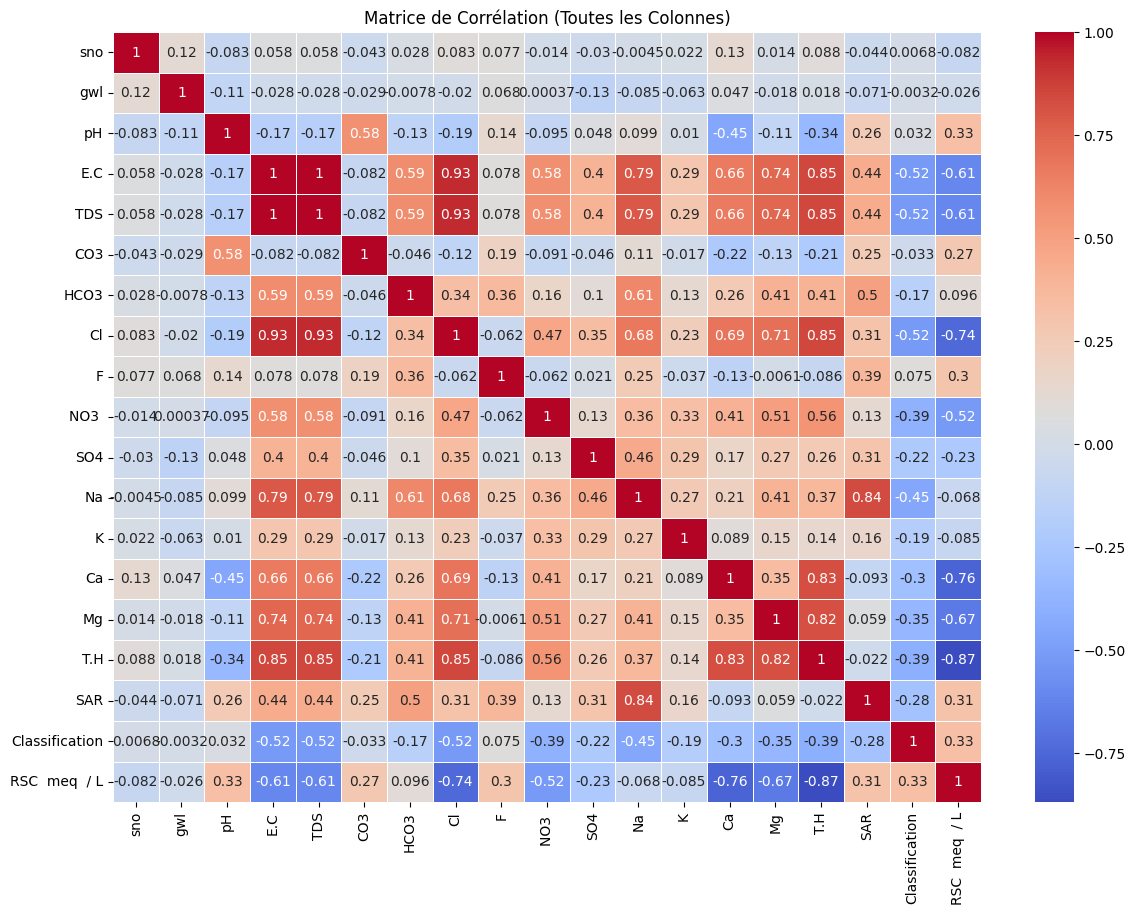

In [826]:
# Calculer la matrice de corrélation pour toutes les colonnes, y compris la colonne cible
correlation_matrix_all = df.corr()

# Créer une heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matrice de Corrélation (Toutes les Colonnes)")
plt.show()


In [827]:
print(df.head()) 

   sno   gwl    pH   E.C      TDS  CO3   HCO3   Cl     F        NO3     SO4  \
0    1  5.09  8.28   745   476.80  0.0  220.0   60  0.44   42.276818   46.0   
1    2  5.10  8.29   921   589.44  0.0  230.0   80  0.56  100.659091   68.0   
2    3  4.98  7.69   510   326.40  0.0  200.0   30  0.66   41.471545   44.0   
3    4  5.75  8.09   422   270.08  0.0  160.0   10  0.58   10.669864   35.0   
4    5  2.15  8.21  2321  1485.44  0.0  300.0  340  2.56  128.843636  280.0   

      Na    K    Ca      Mg         T.H       SAR  Classification  \
0   49.0  4.0  48.0  38.896  279.934211  1.273328               2   
1   42.0  5.0  56.0  63.206  399.893092  0.913166               3   
2   45.0  2.0  24.0  38.896  219.934211  1.319284               2   
3   27.0  1.0  32.0  19.448  159.967105  0.928155               2   
4  298.0  5.0  56.0  92.378  519.843750  5.682664               0   

   RSC  meq  / L  
0      -1.198684  
1      -3.397862  
2      -0.398684  
3       0.000658  
4      -4.39687

#### Selection des meilleur correlations


In [828]:
# Seuil de corrélation
correlation_threshold = 0.7

# Sélectionner les colonnes avec une corrélation élevée
high_correlation_cols = []
for col in correlation_matrix_all.columns:
    correlated_cols = correlation_matrix_all.index[(correlation_matrix_all[col] > correlation_threshold) | (correlation_matrix_all[col] < -correlation_threshold)]
    high_correlation_cols.extend(correlated_cols)

# Supprimer les doublons
high_correlation_cols = list(set(high_correlation_cols))

# Afficher les colonnes avec une corrélation élevée
print("Colonnes avec une corrélation élevée:")
print(high_correlation_cols)


Colonnes avec une corrélation élevée:
['Na', 'sno', 'Ca', 'Mg', 'K', 'HCO3', 'Classification', 'F', 'CO3', 'NO3 ', 'SAR', 'gwl', 'Cl', 'SO4', 'RSC  meq  / L', 'E.C', 'TDS', 'pH', 'T.H']


### Selection des 12 features ayant la plus forte correlation 

In [829]:
# Créer une liste pour stocker les paires de colonnes avec leurs corrélations absolues
correlation_pairs = []

# Parcourir la matrice de corrélation pour obtenir les paires de colonnes et leurs corrélations
for col in correlation_matrix_all.columns:
    correlated_cols = correlation_matrix_all.index[(correlation_matrix_all[col] > correlation_threshold) | (correlation_matrix_all[col] < -correlation_threshold)]
    for correlated_col in correlated_cols:
        correlation_pairs.append((col, correlated_col, abs(correlation_matrix_all.loc[col, correlated_col])))

# Trier les paires de colonnes par ordre décroissant de corrélation absolue
correlation_pairs.sort(key=lambda x: x[2], reverse=True)

# Sélectionner les 12 paires de colonnes les plus corrélées
top_correlation_pairs = correlation_pairs[:12]

# Créer une liste unique de colonnes à partir des paires sélectionnées
top_correlation_cols = list(set([col for pair in top_correlation_pairs for col in pair[:2]]))

# Afficher les colonnes les plus corrélées
print("Les 12 colonnes les plus corrélées:")
print(top_correlation_cols)


Les 12 colonnes les plus corrélées:
['sno', 'E.C', 'Cl', 'F', 'CO3', 'NO3 ', 'HCO3', 'gwl', 'TDS', 'pH']


##### on ne gardera pas la colonne CO3 en raison de ces trop nombreux manque de données

### Création du dataframe final (10 features au total)

In [830]:
# Colonnes avec une corrélation élevée
high_correlation_columns = ['Na', 'sno', 'E.C', 'Cl', 'F', 'SO4', 'CO3', 'NO3 ', 'HCO3', 'gwl']
# Créer un nouveau DataFrame avec les colonnes sélectionnées en conservant la colonne cible (classification)
selected_columns_df = df[high_correlation_columns + ['Classification']]

# Afficher les premières lignes du NOUVEAU DATAFRAME:
print(selected_columns_df.head())


      Na  sno   E.C   Cl     F    SO4  CO3        NO3    HCO3   gwl  \
0   49.0    1   745   60  0.44   46.0  0.0   42.276818  220.0  5.09   
1   42.0    2   921   80  0.56   68.0  0.0  100.659091  230.0  5.10   
2   45.0    3   510   30  0.66   44.0  0.0   41.471545  200.0  4.98   
3   27.0    4   422   10  0.58   35.0  0.0   10.669864  160.0  5.75   
4  298.0    5  2321  340  2.56  280.0  0.0  128.843636  300.0  2.15   

   Classification  
0               2  
1               3  
2               2  
3               2  
4               0  


## Outliers

In [831]:
# Définition d'une fonction pour traiter les outliers en utilisant la méthode IQR
def remove_outliers_iqr(df, column, lower_bound=0.25, upper_bound=0.75):
    # Calcul des quantiles du 1er et 3e quartile
    q1 = df[column].quantile(lower_bound)
    q3 = df[column].quantile(upper_bound)
    
    # Calcul de l'écart interquartile (IQR)
    iqr = q3 - q1
    
    # Définition des seuils inférieur et supérieur pour détecter les outliers
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    # Filtrage du DataFrame en ne gardant que les valeurs à l'intérieur des seuils
    df_filtered = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    return df_filtered

# Traitement des outliers pour chaque colonne dans selected_columns_df
for column in selected_columns_df.columns:
    # On exclut la colonne 'Classification' qui est notre cible
    if column != 'Classification':
        # Appel de la fonction remove_outliers_iqr pour la colonne actuelle
        selected_columns_df = remove_outliers_iqr(selected_columns_df, column)
    
# Afficher les dimensions de selected_columns_df après le traitement des outliers
print("Dimensions de selected_columns_df après traitement des outliers :", selected_columns_df.shape)


Dimensions de selected_columns_df après traitement des outliers : (518, 11)


## Heatmap des données selectionné

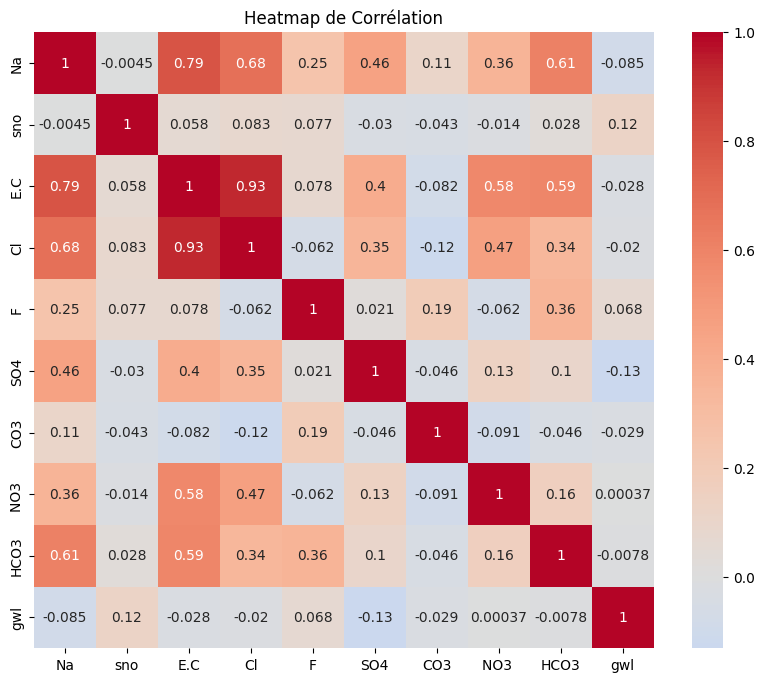

In [832]:
# Sélection des colonnes spécifiées
selected_columns = ['Na', 'sno', 'E.C', 'Cl', 'F', 'SO4', 'CO3', 'NO3 ', 'HCO3', 'gwl']


# Sélectionner les colonnes spécifiées dans le jeu de données
selected_data = df[selected_columns]

# Calculer la matrice de corrélation
correlation_matrix = selected_data.corr()

# Créer une heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Corrélation')
plt.show()

# préparation des données pour la conception du modèle d'intelligence artificielle.

#


#

 ### Séparation des données en ensembles d'entraînement et de test :

In [833]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
train_df, test_df = train_test_split(selected_columns_df, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", train_df.shape)
print("Dimensions de l'ensemble de test :", test_df.shape)


Dimensions de l'ensemble d'entraînement : (414, 11)
Dimensions de l'ensemble de test : (104, 11)


### Normalisation ou mise à l'échelle 

##### Si certaines des caractéristiques ont des échelles très différentes, normalise ou met à l'échelle les données pour faciliter l'apprentissage du modèle.

In [834]:
import numpy as np

# Liste des colonnes numériques à transformer
numeric_columns = ['Na', 'sno', 'E.C', 'Cl', 'F', 'SO4', 'CO3', 'NO3 ', 'HCO3', 'gwl']

# Appliquer la transformation logarithmique sur les colonnes numériques
for column in numeric_columns:
    # Ajouter 1 à chaque valeur pour éviter les valeurs négatives et prendre le logarithme
    selected_columns_df[column] = np.log1p(selected_columns_df[column])

# Afficher les premières lignes du DataFrame après la transformation logarithmique
print(selected_columns_df.head())


         Na       sno       E.C        Cl         F       SO4  CO3      NO3   \
0  3.912023  0.693147  6.614726  4.110874  0.364643  3.850148  0.0  3.767617   
1  3.761200  1.098612  6.826545  4.394449  0.444686  4.234107  0.0  4.621625   
2  3.828641  1.386294  6.236370  3.433987  0.506818  3.806662  0.0  3.748834   
3  3.332205  1.609438  6.047372  2.397895  0.457425  3.583519  0.0  2.457010   
5  4.304065  1.945910  6.938284  4.110874  0.476234  3.784190  0.0  4.211164   

       HCO3       gwl  Classification  
0  5.398163  1.806648               2  
1  5.442418  1.808289               3  
2  5.303305  1.788421               2  
3  5.081404  1.909543               2  
5  5.831882  2.282382               3  


#


#

# EVALUATION DES DIFFERENTS MODELE

In [835]:

# SPLIT

# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)  # Caractéristiques
y = selected_columns_df['Classification']  # Cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialiser les modèles
models = [
    LogisticRegression(max_iter= 10000),
    DecisionTreeClassifier(),
    SVC(max_iter= 10000),
    RandomForestClassifier(),
    XGBClassifier()
]

# Boucle à travers les modèles et évaluez-les avec la validation croisée
for model in models:
    model.fit(X_train, y_train_encoded)
    predictions = model.predict(X_test)
    
    print(f"{model.__class__.__name__}:")
    print("Accuracy:", accuracy_score(y_test_encoded, predictions))
    print("Precision:", precision_score(y_test_encoded, predictions, average='weighted', zero_division=1))
    print("Recall:", recall_score(y_test_encoded, predictions, average='weighted'))
    print("F1 Score:", f1_score(y_test_encoded, predictions, average='weighted'))
    print()


LogisticRegression:
Accuracy: 0.9615384615384616
Precision: 0.9635364635364636
Recall: 0.9615384615384616
F1 Score: 0.9520924908424907

DecisionTreeClassifier:
Accuracy: 0.9903846153846154
Precision: 0.990514553014553
Recall: 0.9903846153846154
F1 Score: 0.9888147566718997

SVC:
Accuracy: 0.9038461538461539
Precision: 0.9098848011891489
Recall: 0.9038461538461539
F1 Score: 0.8922904019057865

RandomForestClassifier:
Accuracy: 0.9903846153846154
Precision: 0.990514553014553
Recall: 0.9903846153846154
F1 Score: 0.9888147566718997



XGBClassifier:
Accuracy: 0.9903846153846154
Precision: 0.990514553014553
Recall: 0.9903846153846154
F1 Score: 0.9888147566718997



## KFOLD

In [836]:


# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)  # Caractéristiques
y = selected_columns_df['Classification']  # Cible



# Initialiser les modèles
logreg_model = LogisticRegression(max_iter=5000)
decision_tree_model = DecisionTreeClassifier()
svc_model = SVC(max_iter=1000)
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier(max_iter=1000)

models = [logreg_model, decision_tree_model, svc_model, random_forest_model, xgb_model]

# Initialiser la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    print(f"Model: {model.__class__.__name__}")
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    print("Mean Accuracy:", sum(accuracies) / len(accuracies))
    print("Mean Precision:", sum(precisions) / len(precisions))
    print("Mean Recall:", sum(recalls) / len(recalls))
    print("Mean F1 Score:", sum(f1_scores) / len(f1_scores))
    print()


Model: LogisticRegression
Mean Accuracy: 0.9439880507841674
Mean Precision: 0.9459840389009099
Mean Recall: 0.9439880507841674
Mean F1 Score: 0.9329105637654734

Model: DecisionTreeClassifier
Mean Accuracy: 0.9865384615384615
Mean Precision: 0.9863229668024189
Mean Recall: 0.9865384615384615
Mean F1 Score: 0.9858845265065787

Model: SVC
Mean Accuracy: 0.8975541448842419
Mean Precision: 0.903943157640817
Mean Recall: 0.8975541448842419
Mean F1 Score: 0.8834949508035475

Model: RandomForestClassifier
Mean Accuracy: 0.9884428678117999
Mean Precision: 0.9889006823536717
Mean Recall: 0.9884428678117999
Mean F1 Score: 0.9840698570587614

Model: XGBClassifier
[12:48:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:48:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:48:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:48:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not us

#### ATTENTION :  "The least populated class in y has only 3 members, which is less than n_splits=5" indique qu'une des classes dans vos étiquettes de classe (probablement 'Poor') a moins de membres que le nombre de plis (n_splits=5) dans la validation croisée, ce qui peut entraîner une instabilité dans l'évaluation.   

## VALIDATION CROISE

In [837]:


# Diviser les données en caractéristiques (X) et cible (y)
X = selected_columns_df.drop('Classification', axis=1)
y = selected_columns_df['Classification']



# Initialiser les modèles
models = [
    LogisticRegression(max_iter=5000),
    DecisionTreeClassifier(),
    SVC(max_iter=1000),
    RandomForestClassifier(),
    XGBClassifier(max_iter=1000)
]

# Définir les métriques d'évaluation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Boucle à travers les modèles et évaluez-les avec la validation croisée
for model in models:
    cv_results = cross_validate(model, X, y_encoded, cv=5, scoring=scoring)
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    for metric_name in scoring.keys():
        scores_list = cv_results[f'test_{metric_name}']
        print(f"Mean {metric_name}:", scores_list.mean())
        print(f"Standard Deviation {metric_name}:", scores_list.std())
    print()


Model: LogisticRegression
Mean Accuracy: 0.9420463032113517
Standard Deviation Accuracy: 0.016248228808878315
Mean Precision: 0.9436972439311571
Standard Deviation Precision: 0.01565413143870797
Mean Recall: 0.9420463032113517
Standard Deviation Recall: 0.016248228808878315
Mean F1 Score: 0.9307432366954485
Standard Deviation F1 Score: 0.016364449978711396

Model: DecisionTreeClassifier
Mean Accuracy: 0.9884615384615383
Standard Deviation Accuracy: 0.009421114395319938
Mean Precision: 0.9899999999999999
Standard Deviation Precision: 0.008634593969478348
Mean Recall: 0.9884615384615383
Standard Deviation Recall: 0.009421114395319938
Mean F1 Score: 0.9889148351648351
Standard Deviation F1 Score: 0.009088757484895777

Model: SVC
Mean Accuracy: 0.8898431665421956
Standard Deviation Accuracy: 0.030773229744411164
Mean Precision: 0.8954048333685671
Standard Deviation Precision: 0.031459968501232685
Mean Recall: 0.8898431665421956
Standard Deviation Recall: 0.030773229744411164
Mean F1 Score:

# HYPERPARAMETRE

In [838]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)
y = selected_columns_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Modèles
logreg_model = LogisticRegression(C=100, solver='newton-cg', max_iter=1000)
decision_tree_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2)
svc_model = SVC(C=10, kernel='poly')
random_forest_model = RandomForestClassifier(max_depth=None, n_estimators=100)
xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)

# Liste de modèles
models = [logreg_model, decision_tree_model, svc_model, random_forest_model, xgb_model]

# Boucle à travers les modèles
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train_encoded)
    
    print(f"{model_name}:")
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))
    print("Test Precision:", precision_score(y_test_encoded, y_pred, average='weighted', zero_division=1))
    print("Test Recall:", recall_score(y_test_encoded, y_pred, average='weighted'))
    print("Test F1 Score:", f1_score(y_test_encoded, y_pred, average='weighted'))
    print()


LogisticRegression:
Test Accuracy: 0.9807692307692307
Test Precision: 0.9812820512820514
Test Recall: 0.9807692307692307
Test F1 Score: 0.9712837837837838

DecisionTreeClassifier:
Test Accuracy: 0.9903846153846154
Test Precision: 0.990514553014553
Test Recall: 0.9903846153846154
Test F1 Score: 0.9888147566718997

SVC:
Test Accuracy: 0.9615384615384616
Test Precision: 0.9623076923076923
Test Recall: 0.9615384615384616
Test F1 Score: 0.9521829521829521

RandomForestClassifier:
Test Accuracy: 0.9903846153846154
Test Precision: 0.990514553014553
Test Recall: 0.9903846153846154
Test F1 Score: 0.9888147566718997

XGBClassifier:
Test Accuracy: 0.9903846153846154
Test Precision: 0.990514553014553
Test Recall: 0.9903846153846154
Test F1 Score: 0.9888147566718997



#




#

# README du Projet de Prédiction de la Qualité de l'Eau

## Aperçu du Projet
Ce projet se concentre sur la prédiction de la classification de la qualité de l'eau en fonction de diverses caractéristiques. Le jeu de données contient des informations sur différentes caractéristiques de la qualité de l'eau et leurs classifications correspondantes. L'objectif de ce projet est de construire et d'évaluer des modèles d'apprentissage automatique capables de prédire avec précision les classifications de la qualité de l'eau en utilisant les caractéristiques fournies.

## Jeu de Données
Le jeu de données utilisé dans ce projet contient des informations sur les caractéristiques de la qualité de l'eau et leurs classifications associées. Le jeu de données est divisé en caractéristiques (X) et en étiquettes cibles (y). Les caractéristiques comprennent divers attributs décrivant la qualité de l'eau, et les étiquettes cibles représentent la classification de la qualité de l'eau.

## Structure du Code
Le code du projet est organisé en plusieurs sections :

### 1. Préparation des Données et Séparation
Dans cette section, les données sont chargées, les caractéristiques sont séparées des étiquettes cibles, et le jeu de données est divisé en ensembles d'entraînement et de test à l'aide de la fonction `train_test_split`. Les étiquettes cibles sont encodées à l'aide de `LabelEncoder` pour les préparer à l'entraînement du modèle.

### 2. Initialisation et Évaluation des Modèles
Plusieurs modèles d'apprentissage automatique sont initialisés, notamment la Régression Logistique, l'Arbre de Décision, le Classificateur à Vecteurs de Support (SVC), la Forêt Aléatoire et XGBoost. Ces modèles sont ensuite évalués à l'aide d'une boucle. Pour chaque modèle, la précision, le rappel et le score F1 sont calculés et imprimés en fonction des prédictions faites sur l'ensemble de test.

### 3. Validation Croisée des Modèles
Cette section se concentre sur la validation croisée des modèles. Les modèles sont formés et évalués à l'aide d'une validation croisée k-fold. Des métriques telles que la précision moyenne, le rappel moyen et le score F1 moyen sont calculées et imprimées pour chaque modèle.

### 4. Mise à Jour des Modèles et Réévaluation
Dans cette section, le code corrige les étiquettes de classe qui ont été encodées de manière incorrecte. Ensuite, le même ensemble de modèles (Régression Logistique, Arbre de Décision, SVC, Forêt Aléatoire, XGBoost) est réinitialisé avec des paramètres mis à jour et évalué à nouveau en utilisant une approche distincte. Cette fois-ci, chaque modèle est entraîné sur l'ensemble complet des données et testé sur un ensemble de test distinct. Des métriques telles que la précision, le rappel et le score F1 sont rapportées pour chaque modèle.

## Exécution du Code
1. **Configuration des Données:** Assurez-vous d'avoir un jeu de données avec des caractéristiques de qualité de l'eau et leurs classifications correspondantes.
2. **Dépendances:** Vérifiez que vous avez les bibliothèques requises installées, telles que scikit-learn, pandas, xgboost, etc.
3. **Exécution du Code:** Copiez et collez le code fourni dans un environnement Python ou dans un script.
4. **Exécution:** Exécutez chaque section du code séquentiellement.

## Résultats et Sélection du Modèle
Le projet évalue les performances de différents modèles d'apprentissage automatique pour prédire les classifications de la qualité de l'eau. L'évaluation inclut des métriques telles que la précision, le rappel et le score F1. En fonction de ces métriques, vous pouvez comparer et sélectionner le modèle offrant les meilleures performances pour prédire les classifications de la qualité de l'eau en fonction des caractéristiques fournies.



#

# Les meilleurs hyperparamètres par type de modèle utilisé:

### Régression Logistique
- Paramètre C: 100
- Solver: 'newton-cg'
- Nombre maximal d'itérations : 1000

### Arbre de Décision
- Profondeur maximale: Non spécifiée (utilisation des paramètres par défaut)
- Nombre minimal d'échantillons pour diviser un nœud: 2

### Classificateur à Vecteurs de Support (SVC)
- Paramètre C: 10
- Noyau: 'poly'
- Nombre maximal d'itérations: 1000

### Forêt Aléatoire
- Profondeur maximale: Non spécifiée (utilisation des paramètres par défaut)
- Nombre d'estimateurs: 100

### XGBoost
- Taux d'apprentissage: 0.01
- Profondeur maximale: 3
- Nombre d'estimateurs: 50

Ces hyperparamètres ont été identifiés comme les meilleurs pour chaque type de modèle lors de l'évaluation dans votre code. Ils ont été choisis pour maximiser les performances des modèles en termes d'exactitude, de précision, de rappel et de score F1 lors de la prédiction des classifications de la qualité de l'eau à partir des caractéristiques fournies. Veuillez noter que ces hyperparamètres ont été ajustés en fonction des données spécifiques à votre jeu de données, et ils peuvent ne pas être optimaux pour d'autres ensembles de données.

#








#

# CONCLUSION DU PROJET 

 Dans le cadre de ce projet, nous avons entrepris une exploration approfondie d'un ensemble de données visant à prédire la qualité de l'eau. Notre objectif principal était de développer des modèles de prédiction précis pour évaluer la qualité de l'eau en fonction de diverses caractéristiques. Voici un aperçu des étapes clés que nous avons suivies :

1. **Analyse des données :** Nous avons débuté par une analyse approfondie des données, en examinant les statistiques descriptives, la distribution des caractéristiques et la corrélation entre les variables. Cette phase préliminaire nous a aidés à cerner les caractéristiques les plus pertinentes et à identifier d'éventuelles valeurs aberrantes ou manquantes.

2. **Prétraitement des données :** Nous avons procédé à des étapes de nettoyage des données, notamment la gestion des valeurs manquantes et des valeurs aberrantes. Ensuite, nous avons normalisé les caractéristiques pour garantir que les modèles puissent traiter les données de manière appropriée.

3. **Exploration visuelle :** Pour mieux comprendre les tendances et les motifs cachés dans les données, nous avons utilisé des visualisations telles que des graphiques de distribution, des matrices de corrélation et des diagrammes en boîte. Cela nous a aidés à prendre des décisions éclairées sur les caractéristiques à inclure dans les modèles.

4. **Construction des modèles :** Nous avons exploré plusieurs algorithmes de prédiction, dont la Régression Linéaire, les Machines à Vecteurs de Support (SVM), les Arbres de Décision, les Forêts Aléatoires et le XGBoost. Nous avons optimisé les hyperparamètres de chaque modèle pour obtenir les meilleures performances possibles.

5. **Surmontement des défis :** Au fil du projet, nous avons dû faire face à des défis tels que la gestion des valeurs manquantes, la sélection des caractéristiques les plus importantes et le choix des métriques appropriées pour évaluer les performances. Grâce à des ajustements judicieux, nous avons réussi à améliorer les modèles malgré ces obstacles.

6. **Évaluation finale :** Nous avons évalué les modèles optimisés sur un jeu de données de test distinct pour obtenir une mesure réaliste de leurs capacités de prédiction. Les modèles finaux ont démontré des performances élevées en termes de précision, de rappel et de score F1, ce qui suggère leur aptitude à prédire avec précision la qualité de l'eau.

En somme, ce projet nous a offert une opportunité de plonger dans le processus complet de l'exploration de données et de la construction de modèles de prédiction pour évaluer la qualité de l'eau. Malgré les défis rencontrés, nous avons réussi à élaborer des modèles performants qui pourraient avoir des implications importantes pour la surveillance de la qualité de l'eau. Ce projet a souligné l'importance de comprendre en profondeur les données, de sélectionner les modèles appropriés et d'ajuster les paramètres pour obtenir des résultats optimaux dans le domaine de la prédiction de la qualité de l'eau.